<a href="https://colab.research.google.com/github/Langrzyk/COVID-19-quick-analysis-/blob/master/W_Obliczu_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#W Obliczu COVID-19

Analiza danych o COVID-19 w ramach kursu Korona Science

Autor: Betina Langrzyk

##Import potrzebnych bibliotek

Do obsługi pakietu pandas, wykresów i aktualnej daty

In [0]:
from typing import List
import pandas as pd
import datetime
#import os

import matplotlib.pyplot as plt
import plotly.express as px

##Wczytanie danych, tworzenie DataFarmes z danymi


In [0]:
def dataSet(dataset) -> pd.core.frame.DataFrame:
  """
  Returns created DataFrame from dataset

  :param dataset: str specifying which data set to load 
  :return: DataFrame created from dataset
  """

  if(dataset == "confirmed"):  # confirmed cases
    url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series" \
          f"/time_series_covid19_confirmed_global.csv"

  if(dataset == "deaths"): # deaths
    url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series" \
          f"/time_series_covid19_deaths_global.csv"

  if(dataset == "recovered"): # recovered cases
    url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series"  \
          f"/time_series_covid19_recovered_global.csv"
  
  raw_data =  pd.read_csv(url, error_bad_lines=False)

  return raw_data

dfC = dataSet('confirmed')
dfD = dataSet('deaths')
dfR = dataSet('recovered')

##Wyświetlenie info() oraz head() dla wszystkich DF do sprawdzenia poprawności wczytania

In [0]:
dfC.info()

In [138]:
dfC.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19


In [0]:
dfD.info()

In [140]:
dfD.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [0]:
dfR.info()

In [142]:
dfR.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71,128,128,128,169,169
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4,4,4,5,5,5


##Czyszczenie danych

Dane bez podziału na prowincje

In [0]:
def onlyCountry(raw_data) -> pd.core.frame.DataFrame:
  """
  Returns DataFrame without Provinces/States
  
  :param raw_data: raw DataFrame with a data
  :return: DataFrame without Provinces/States
  """
  df2 = raw_data.groupby(["Country/Region"]).sum()
  df3 = df2.drop(['Lat', 'Long'], axis=1)
  df = df3.reset_index()

  return df

df1C = onlyCountry(dfC)
df1D = onlyCountry(dfD)
df1R = onlyCountry(dfR)

Przygotowanie danych do porównania

In [0]:
def dataclean(raw_data) -> pd.core.frame.DataFrame:
  """
  Returns Unpivoted DataFrame with index ['Country/Region','Date']
  
  :param raw_data: raw DataFrame with a data
  :return: Unpivoted DataFrame with index ['Country/Region','Date']
  """
  df1 = onlyCountry(raw_data)
  df = df1.melt(id_vars=['Country/Region'],value_name='Cases',var_name='Date')
  df = df.set_index(['Country/Region','Date'])
  
  return df

df2C = dataclean(dfC)
df2D = dataclean(dfD)
df2R = dataclean(dfR)

##ANALIZA DANYCH I PREZENTACJA:

##Choropleth Maps:

Prezentacja danych na mapie

In [0]:
def createMap(raw_data,colors,scope,title) -> plt.Figure:
  """
  Returns the prepared Figure for display

  :param raw_data: raw DataFrame with a data
  :param color: list of str, String should define valid CSS-colors
  :param scope: str defining the display range
  :param title: str title
  :return: plotly.graph_objects.Figure
  """
  actual = (datetime.date.today()- datetime.timedelta(days=1)).strftime('%m/%d/%y').lstrip("0").replace(" 0", " ").lstrip("0").replace("/0", "/")
  fig = px.choropleth(onlyCountry(raw_data), 
                      locations="Country/Region", 
                      locationmode='country names', 
                      color=actual,  
                      color_continuous_scale = colors,  
                      title='Smiertelnosc COVID19 na swiecie',
                      scope = scope)

  fig.update_layout(
    title_text = title,
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = True,
        projection_type='mollweide'
    ))
  
  return fig


ŚWIAT

In [146]:
createMap(dfC,'magenta','world','Potwierdzone przypadki COVID-19 na świecie').show()

In [147]:
createMap(dfD,'greys','world','Przypadki śmierci z powodu COVID-19 na świecie').show()

In [148]:
createMap(dfR,'greens','world','Przypadki wyleczenia z COVID-19 na świecie').show()

EUROPA

In [149]:
createMap(dfC[dfC['Country/Region'] != "US"],'Magenta','europe','Potwierdzone przypadki COVID-19 w Europie').show()

In [150]:
createMap(dfD[dfD['Country/Region'] != "US"],'greys','europe','Przypadki śmierci z powodu COVID-19 w Europie').show()

In [151]:
createMap(dfR[dfR['Country/Region'] != "China"],'greens','europe','Przypadki wyleczenia z COVID-19 w europie').show()

##Porównanie Polski z innym krajem

In [0]:
def comparePLwith(country,raw_data) -> pd.core.frame.DataFrame:
  """
  Returns DataFrame of the two merged objects: Poland and chosen country
  
  :param country: str country name to merge with poland
  :param raw_data: raw DataFrame with a data
  :return: A DataFrame of the two merged objects
  """
  poland = dataclean(raw_data).loc["Poland"]
  compare = dataclean(raw_data).loc[country]
  df=poland.merge(compare, left_on="Date", right_on="Date").rename(columns={"Cases_x":"Polska","Cases_y":country})

  return df


CHINY

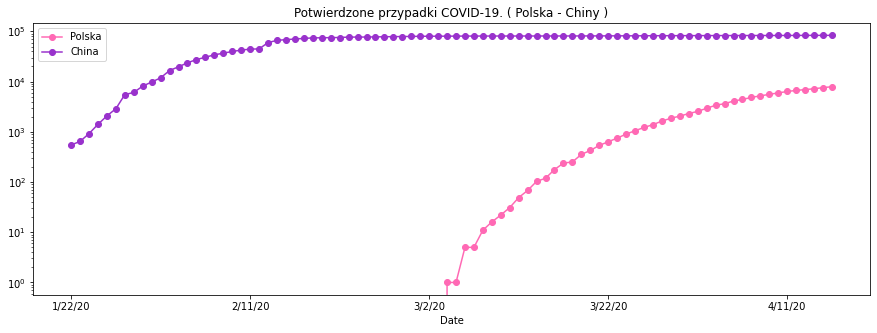

In [153]:
comparePLwith("China",dfC).plot(y=['Polska', 'China'], color = ['hotpink', 'darkorchid'], figsize=(15,5), marker='o', title='Potwierdzone przypadki COVID-19. ( Polska - Chiny )', logy=True)
plt.show()

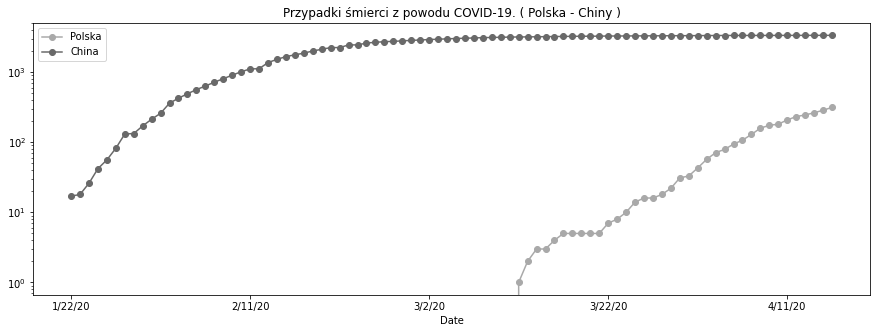

In [154]:
comparePLwith("China",dfD).plot(y=['Polska', 'China'], color = ['darkgrey', 'dimgrey'], figsize=(15,5), marker='o', title='Przypadki śmierci z powodu COVID-19. ( Polska - Chiny )', logy=True)
plt.show()

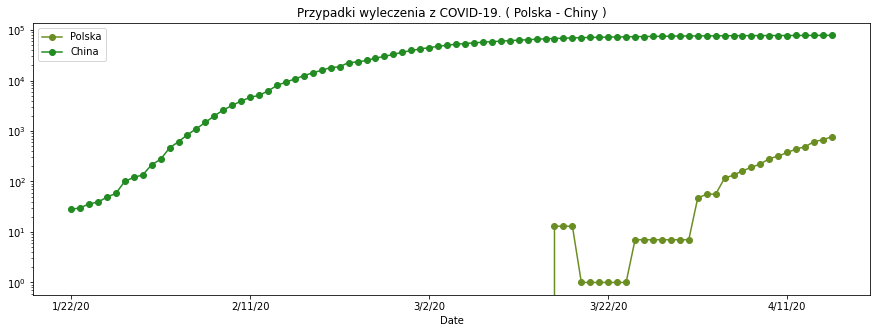

In [155]:
comparePLwith("China",dfR).plot(y=['Polska', 'China'], color = ['olivedrab', 'forestgreen'], figsize=(15,5), marker='o', title='Przypadki wyleczenia z COVID-19. ( Polska - Chiny )', logy=True)
plt.show()

WŁOCHY

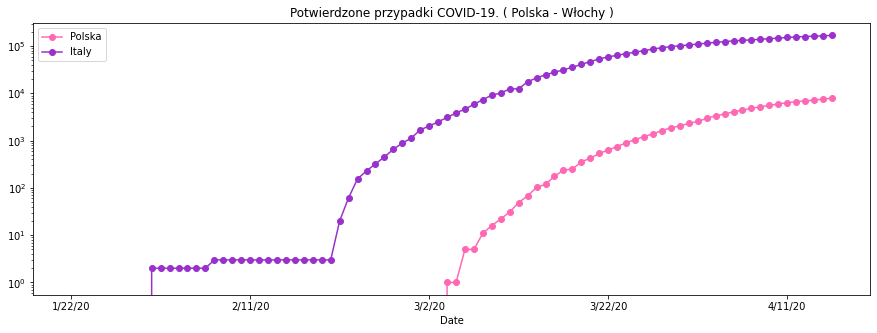

In [156]:
comparePLwith("Italy",dfC).plot(y=['Polska', 'Italy'], color = ['hotpink', 'darkorchid'], figsize=(15,5), marker='o', title='Potwierdzone przypadki COVID-19. ( Polska - Włochy )', logy=True)
plt.show()

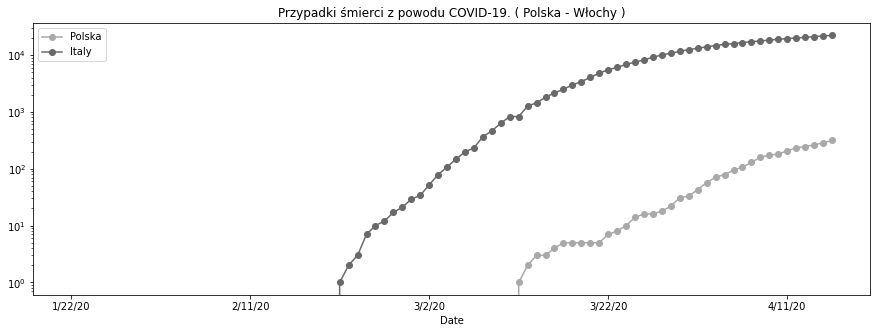

In [157]:
comparePLwith("Italy",dfD).plot(y=['Polska', 'Italy'], color = ['darkgrey', 'dimgrey'], figsize=(15,5), marker='o', title='Przypadki śmierci z powodu COVID-19. ( Polska - Włochy )', logy=True)
plt.show()

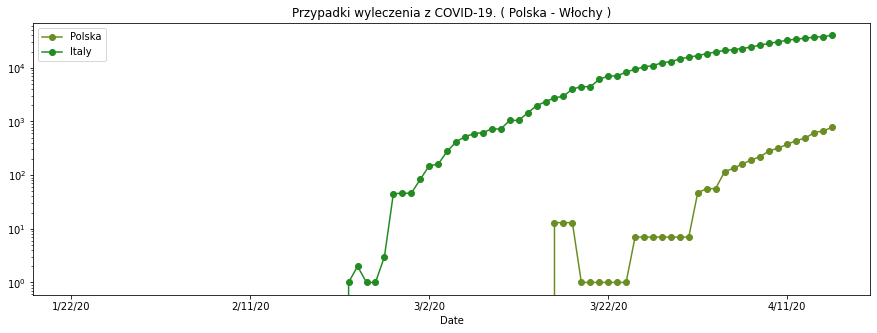

In [158]:
comparePLwith("Italy",dfR).plot(y=['Polska', 'Italy'], color = ['olivedrab', 'forestgreen'], figsize=(15,5), marker='o', title='Przypadki wyleczenia z COVID-19. ( Polska - Włochy )', logy=True)
plt.show()

USA

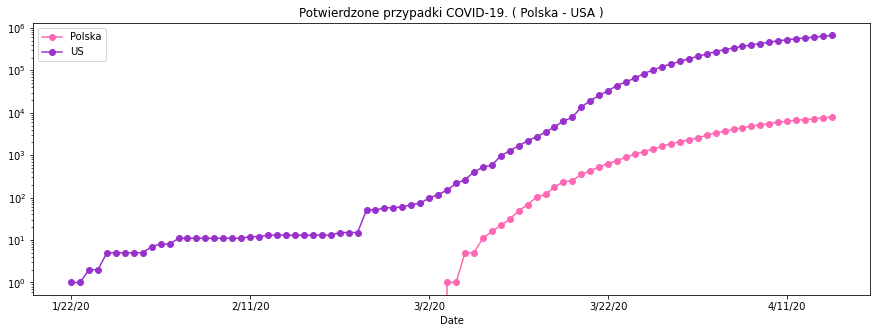

In [159]:
comparePLwith("US",dfC).plot(y=['Polska', 'US'], color = ['hotpink', 'darkorchid'], figsize=(15,5), marker='o', title='Potwierdzone przypadki COVID-19. ( Polska - USA )', logy=True)
plt.show()

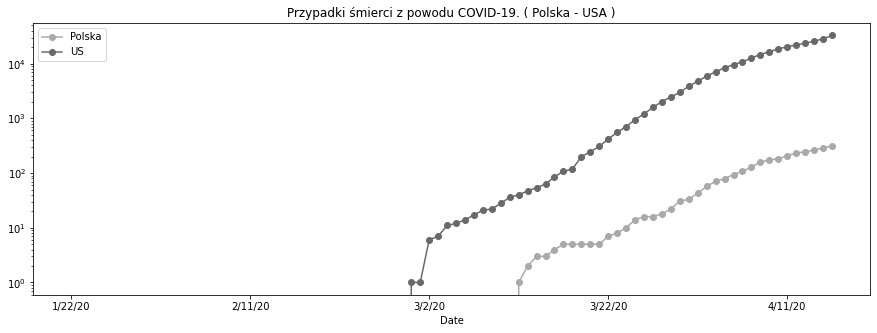

In [160]:
comparePLwith("US",dfD).plot(y=['Polska', 'US'], color = ['darkgrey', 'dimgrey'], figsize=(15,5), marker='o', title='Przypadki śmierci z powodu COVID-19. ( Polska - USA )', logy=True)
plt.show()

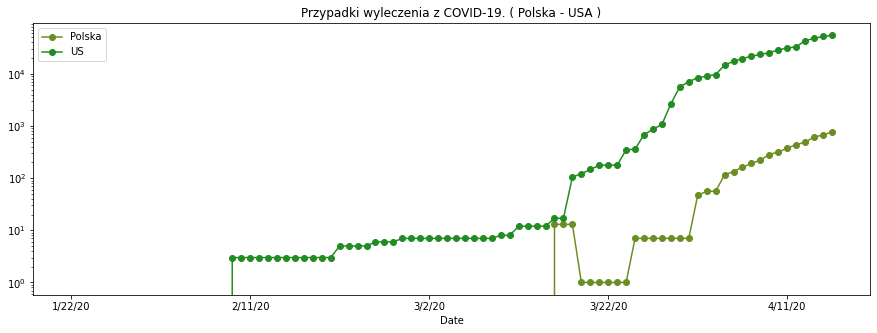

In [161]:
comparePLwith("US",dfR).plot(y=['Polska', 'US'], color = ['olivedrab', 'forestgreen'], figsize=(15,5), marker='o', title='Przypadki wyleczenia z COVID-19. ( Polska - USA )', logy=True)
plt.show()

IRAN

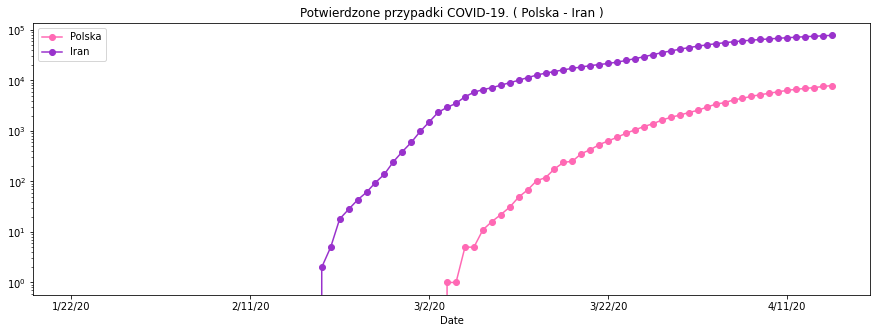

In [162]:
comparePLwith("Iran",dfC).plot(y=['Polska', 'Iran'], color = ['hotpink', 'darkorchid'], figsize=(15,5), marker='o', title='Potwierdzone przypadki COVID-19. ( Polska - Iran )', logy=True)
plt.show()

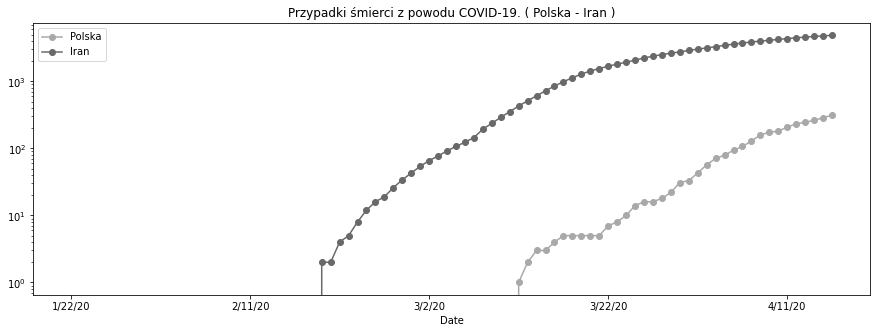

In [163]:
comparePLwith("Iran",dfD).plot(y=['Polska', 'Iran'], color = ['darkgrey', 'dimgrey'], figsize=(15,5), marker='o', title='Przypadki śmierci z powodu COVID-19. ( Polska - Iran )', logy=True)
plt.show()

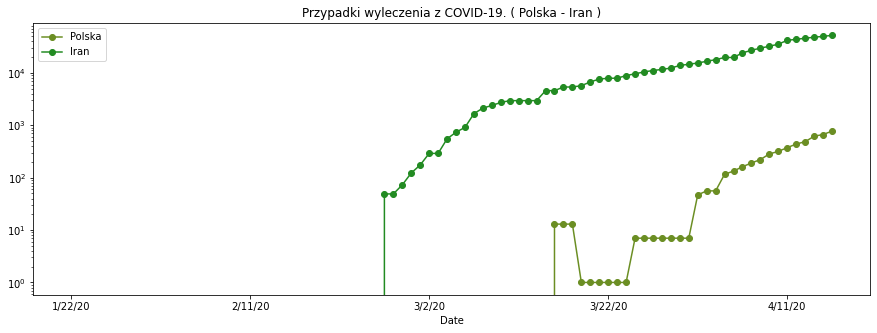

In [164]:
comparePLwith("Iran",dfR).plot(y=['Polska', 'Iran'], color = ['olivedrab', 'forestgreen'], figsize=(15,5), marker='o', title='Przypadki wyleczenia z COVID-19. ( Polska - Iran )', logy=True)
plt.show()

NIEMCY

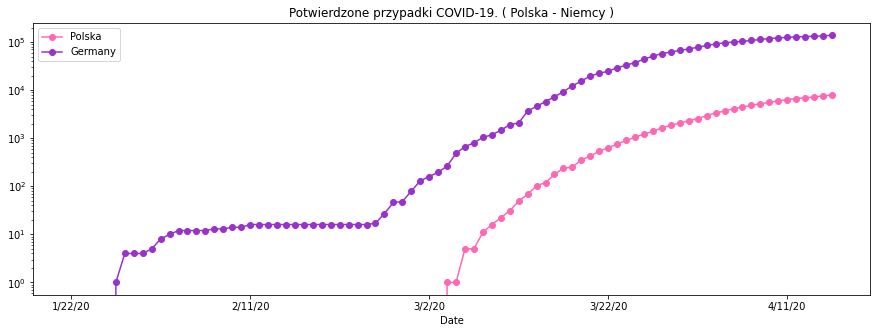

In [165]:
comparePLwith("Germany",dfC).plot(y=['Polska', 'Germany'], color = ['hotpink', 'darkorchid'], figsize=(15,5), marker='o', title='Potwierdzone przypadki COVID-19. ( Polska - Niemcy )', logy=True)
plt.show()

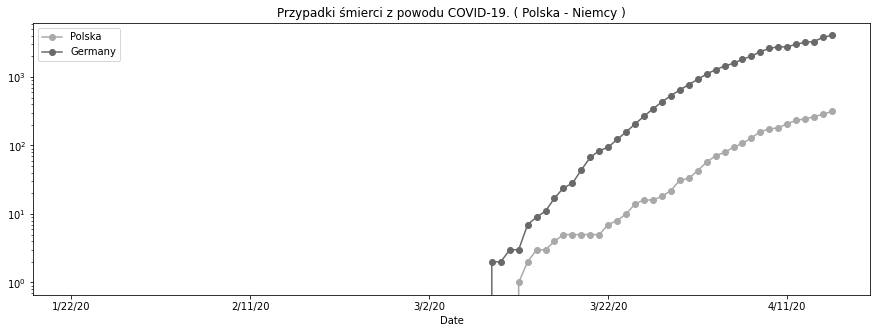

In [166]:
comparePLwith("Germany",dfD).plot(y=['Polska', 'Germany'], color = ['darkgrey', 'dimgrey'], figsize=(15,5), marker='o', title='Przypadki śmierci z powodu COVID-19. ( Polska - Niemcy )', logy=True)
plt.show()

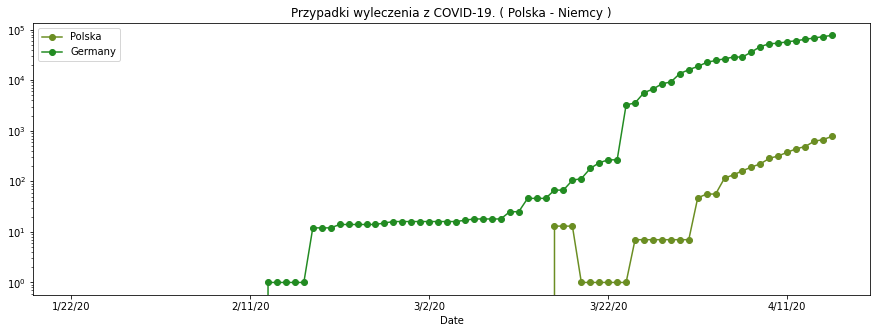

In [167]:
comparePLwith("Germany",dfR).plot(y=['Polska', 'Germany'], color = ['olivedrab', 'forestgreen'], figsize=(15,5), marker='o', title='Przypadki wyleczenia z COVID-19. ( Polska - Niemcy )', logy=True)
plt.show()

CZECHY

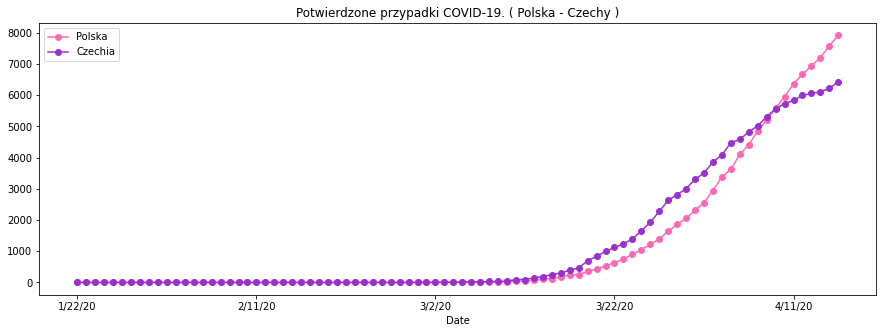

In [168]:
comparePLwith("Czechia",dfC).plot(y=['Polska', 'Czechia'], color = ['hotpink', 'darkorchid'], figsize=(15,5), marker='o', title='Potwierdzone przypadki COVID-19. ( Polska - Czechy )', logy=False)
plt.show()

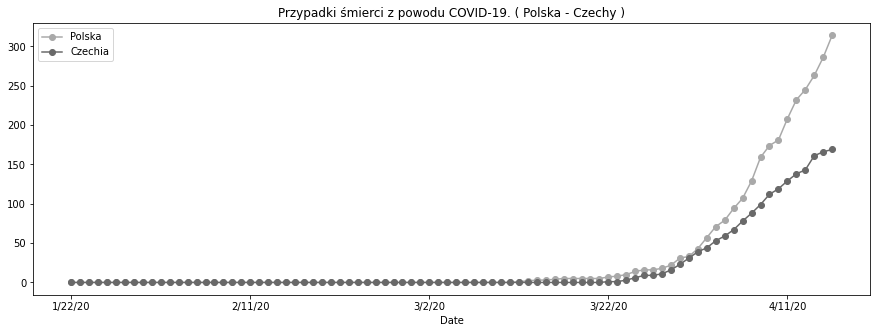

In [169]:
comparePLwith("Czechia",dfD).plot(y=['Polska', 'Czechia'], color = ['darkgrey', 'dimgrey'], figsize=(15,5), marker='o', title='Przypadki śmierci z powodu COVID-19. ( Polska - Czechy )', logy=False)
plt.show()

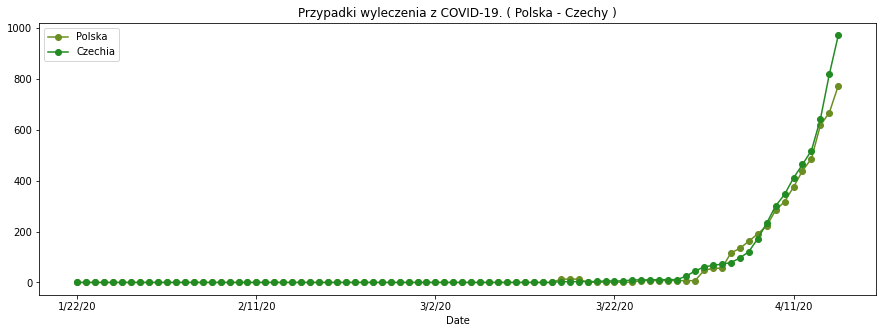

In [170]:
comparePLwith("Czechia",dfR).plot(y=['Polska', 'Czechia'], color = ['olivedrab', 'forestgreen'], figsize=(15,5), marker='o', title='Przypadki wyleczenia z COVID-19. ( Polska - Czechy )', logy=False)
plt.show()